# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [1]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [2]:
import pandas as pd
!pip install pyarrow
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [3]:
df_yellow.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [4]:
df_green.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


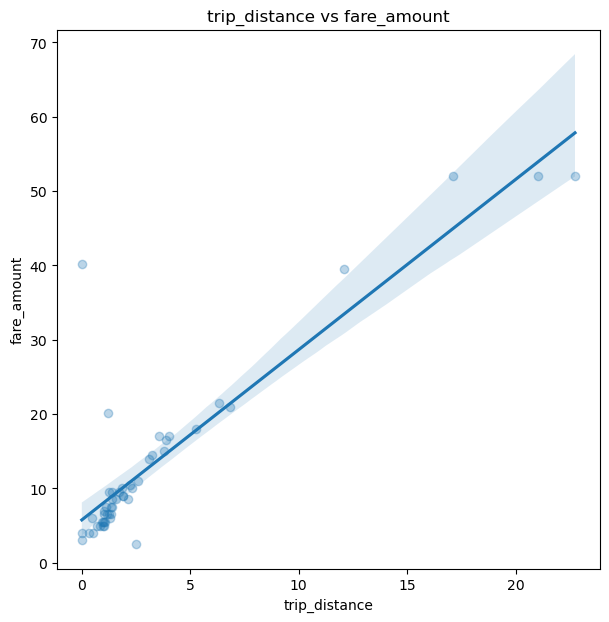

In [5]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

c:\Users\magnu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


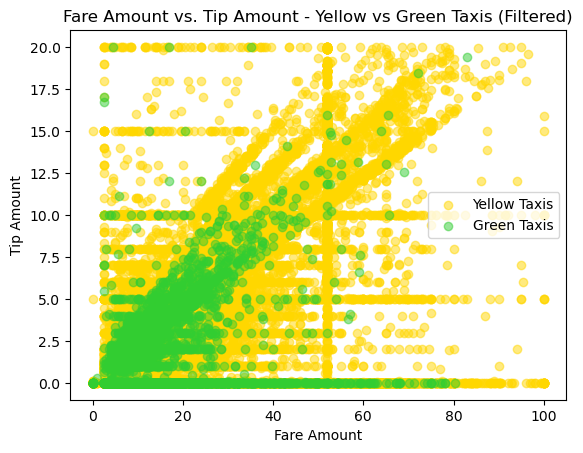

In [6]:
import matplotlib.pyplot as plt

import seaborn as sns

# Set the color palette for muted shades
sns.set_palette("muted")

# Set the range for fare amount and tip amount to hide outliers
fare_range = (0, 100)
tip_range = (0, 20)

# Sample 5% of the data for yellow taxis
sample_yellow = df_yellow.sample(frac=0.05, random_state=42)

# Sample 5% of the data for green taxis
sample_green = df_green.sample(frac=0.05, random_state=42)

# Filter the sampled data to exclude outliers
filtered_yellow = sample_yellow[(sample_yellow['fare_amount'].between(*fare_range)) & (sample_yellow['tip_amount'].between(*tip_range))]
filtered_green = sample_green[(sample_green['fare_amount'].between(*fare_range)) & (sample_green['tip_amount'].between(*tip_range))]

# Scatter plot of fare amount vs. tip amount for yellow taxis (filtered)
plt.scatter(filtered_yellow['fare_amount'], filtered_yellow['tip_amount'], alpha=0.5, label='Yellow Taxis', color='gold')

# Scatter plot of fare amount vs. tip amount for green taxis (filtered)
plt.scatter(filtered_green['fare_amount'], filtered_green['tip_amount'], alpha=0.5, label='Green Taxis', color='limegreen')

plt.xlabel('Fare Amount')
plt.ylabel('Tip Amount')
plt.title('Fare Amount vs. Tip Amount - Yellow vs Green Taxis (Filtered)')
plt.legend()
plt.show()



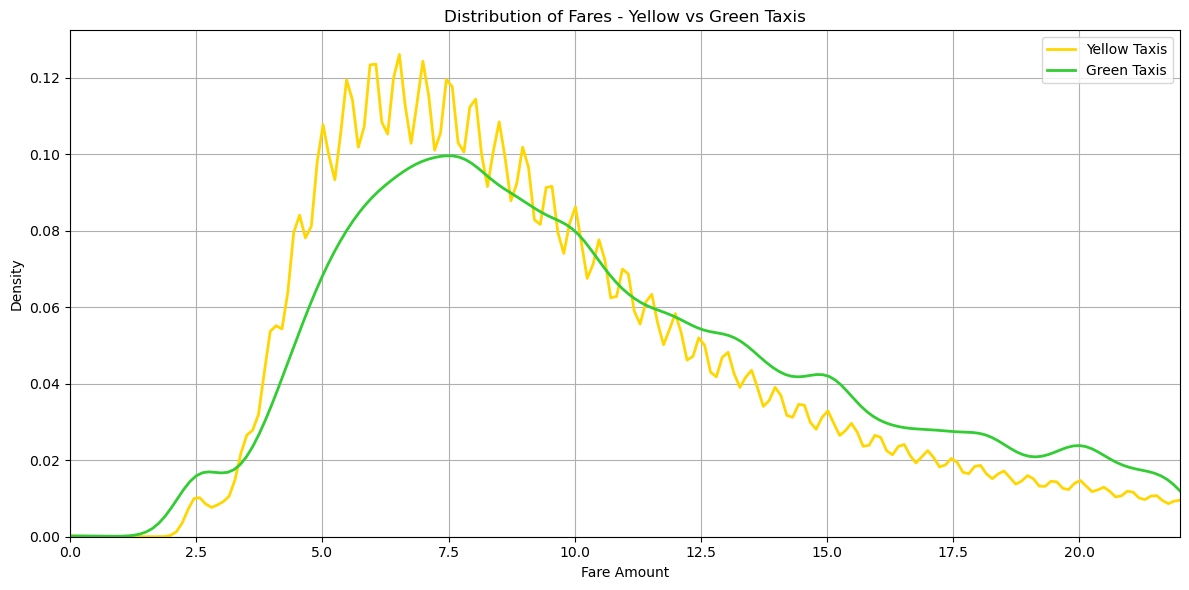

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette for muted shades
sns.set_palette("muted")

# Filter out zero or negative fare amounts and outliers
fare_range = (0, 22)
valid_yellow_fares = df_yellow['fare_amount'][(df_yellow['fare_amount'] > 0) & (df_yellow['fare_amount'] <= 22)]
valid_green_fares = df_green['fare_amount'][(df_green['fare_amount'] > 0) & (df_green['fare_amount'] <= 22)]

# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust the figure size as per your preference

# Plot the distribution of fares for yellow taxis
sns.kdeplot(valid_yellow_fares, color='gold', label='Yellow Taxis', linestyle='-', linewidth=2)

# Plot the distribution of fares for green taxis
sns.kdeplot(valid_green_fares, color='limegreen', label='Green Taxis', linestyle='-', linewidth=2)

# Set axis labels and title
plt.xlabel('Fare Amount')
plt.ylabel('Density')
plt.title('Distribution of Fares - Yellow vs Green Taxis')

# Set x-axis limits
plt.xlim(0, 22)  # Adjust the x-axis limits as per your preference

# Add legend and grid
plt.legend()
plt.grid(True)

# Adjust spacing and layout
plt.tight_layout()

# Show the plot
plt.show()

#The x-axis in this plot represents the fare amount for taxi rides. It indicates the range of fare amounts observed in the dataset. The x-axis is divided into intervals or bins, and the height of the curve at each point represents the density of fares within that range.
# In the given plot, the x-axis represents fare amounts ranging from 0 to 8 dollars. The curve for each taxi type (yellow and green) shows the distribution of fares for that category. The higher the curve at a specific fare amount, the higher the density or frequency of taxi rides with that fare amount.
# By visualizing the distribution of fares, we can observe the patterns and differences between yellow and green taxis in terms of fare amounts. The plot allows us to compare the shapes of the distributions and identify any variations in fare pricing between the two taxi types.
# Keep in mind that the plot is based on the provided filtered and valid fare amounts within the range of 0 to 6 dollars. Adjusting the x-axis limits allows for a wider or narrower range of fare amounts to be displayed, providing more flexibility in visualizing the fare distribution.


c:\Users\magnu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


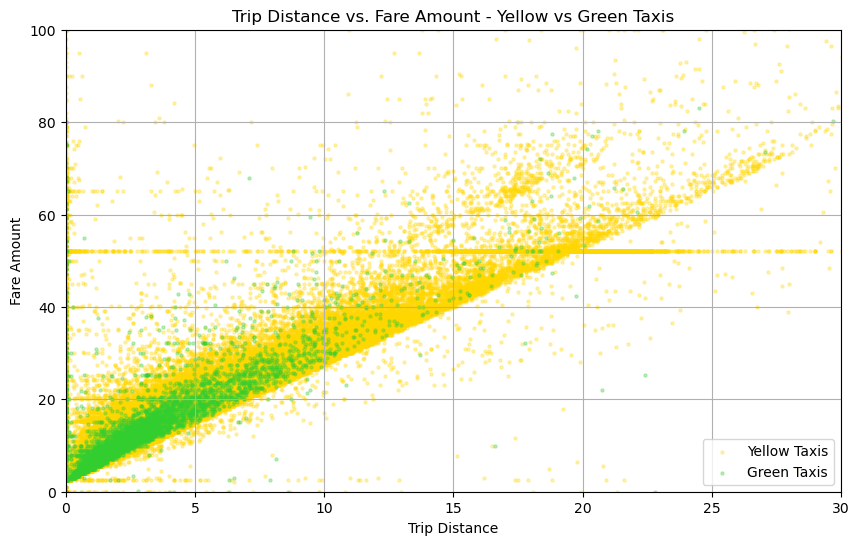

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette for muted shades
sns.set_palette("muted")

# Set the figure size
plt.figure(figsize=(10, 6))

# Sample 5% of the data for yellow taxis
sample_yellow = df_yellow.sample(frac=0.05, random_state=42)

# Sample 5% of the data for green taxis
sample_green = df_green.sample(frac=0.05, random_state=42)

# Scatter plot of trip distance vs. fare amount for yellow taxis
plt.scatter(sample_yellow['trip_distance'], sample_yellow['fare_amount'], alpha=0.3, s=5, label='Yellow Taxis', color='gold')

# Scatter plot of trip distance vs. fare amount for green taxis
plt.scatter(sample_green['trip_distance'], sample_green['fare_amount'], alpha=0.3, s=5, label='Green Taxis', color='limegreen')

plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Trip Distance vs. Fare Amount - Yellow vs Green Taxis')
plt.legend()
plt.grid(True)

# Set the x and y-axis limits to hide outliers
plt.xlim(0, 30)
plt.ylim(0, 100)

plt.show()



### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [9]:
df_zones.head(5)

,Shape_Leng,Shape_Area,zone,LocationID,borough,lat,lng
0,0.116357,0.000782,Newark Airport,1,EWR,40.689516,-74.176786
1,0.433470,0.004866,Jamaica Bay,2,Queens,40.625724,-73.826126
2,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,40.865888,-73.849479
3,0.043567,0.000112,Alphabet City,4,Manhattan,40.724152,-73.977023
4,0.092146,0.000498,Arden Heights,5,Staten Island,40.550340,-74.189930


In [10]:
# Write your code
!pip install keplergl
# Merge latitude and longitude information for yellow pickup locations
yellow_pickup_df = df_yellow[['PULocationID']].merge(df_zones, left_on='PULocationID', right_on='LocationID', how='left')

# Merge latitude and longitude information for yellow dropoff locations
yellow_dropoff_df = df_yellow[['DOLocationID']].merge(df_zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Merge latitude and longitude information for green pickup locations
green_pickup_df = df_green[['PULocationID']].merge(df_zones, left_on='PULocationID', right_on='LocationID', how='left')

# Merge latitude and longitude information for green dropoff locations
green_dropoff_df = df_green[['DOLocationID']].merge(df_zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Filter out invalid latitude and longitude values for yellow pickup and dropoff
yellow_pickup_df = yellow_pickup_df[(yellow_pickup_df['lat'].between(-90, 90)) & (yellow_pickup_df['lng'].between(-180, 180))]
yellow_dropoff_df = yellow_dropoff_df[(yellow_dropoff_df['lat'].between(-90, 90)) & (yellow_dropoff_df['lng'].between(-180, 180))]

# Filter out invalid latitude and longitude values for green pickup and dropoff
green_pickup_df = green_pickup_df[(green_pickup_df['lat'].between(-90, 90)) & (green_pickup_df['lng'].between(-180, 180))]
green_dropoff_df = green_dropoff_df[(green_dropoff_df['lat'].between(-90, 90)) & (green_dropoff_df['lng'].between(-180, 180))]# Merge latitude and longitude information for yellow pickup locations
yellow_pickup_df = df_yellow[['PULocationID']].merge(df_zones, left_on='PULocationID', right_on='LocationID', how='left')

# Merge latitude and longitude information for yellow dropoff locations
yellow_dropoff_df = df_yellow[['DOLocationID']].merge(df_zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Merge latitude and longitude information for green pickup locations
green_pickup_df = df_green[['PULocationID']].merge(df_zones, left_on='PULocationID', right_on='LocationID', how='left')

# Merge latitude and longitude information for green dropoff locations
green_dropoff_df = df_green[['DOLocationID']].merge(df_zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Filter out invalid latitude and longitude values for yellow pickup and dropoff
yellow_pickup_df = yellow_pickup_df[(yellow_pickup_df['lat'].between(-90, 90)) & (yellow_pickup_df['lng'].between(-180, 180))]
yellow_dropoff_df = yellow_dropoff_df[(yellow_dropoff_df['lat'].between(-90, 90)) & (yellow_dropoff_df['lng'].between(-180, 180))]

# Filter out invalid latitude and longitude values for green pickup and dropoff
green_pickup_df = green_pickup_df[(green_pickup_df['lat'].between(-90, 90)) & (green_pickup_df['lng'].between(-180, 180))]
green_dropoff_df = green_dropoff_df[(green_dropoff_df['lat'].between(-90, 90)) & (green_dropoff_df['lng'].between(-180, 180))]


In [11]:
import geopandas as gpd
import keplergl
from sklearn.cluster import DBSCAN
import json
from IPython.display import display

# Randomly sample a fraction of data from yellow_pickup_df and yellow_dropoff_df
pickup_locations = yellow_pickup_df[['lat', 'lng']].sample(frac=0.01).round(decimals=4)
dropoff_locations = yellow_dropoff_df[['lat', 'lng']].sample(frac=0.01).round(decimals=4)

# Create GeoDataFrames from the pickup and dropoff locations
pickup_gdf = gpd.GeoDataFrame(pickup_locations, geometry=gpd.points_from_xy(pickup_locations['lng'], pickup_locations['lat']))
dropoff_gdf = gpd.GeoDataFrame(dropoff_locations, geometry=gpd.points_from_xy(dropoff_locations['lng'], dropoff_locations['lat']))

# Apply DBSCAN clustering algorithm on pickup locations
pickup_clustering = DBSCAN(eps=0.01, min_samples=10).fit(pickup_locations)
pickup_labels = pickup_clustering.labels_

# Apply DBSCAN clustering algorithm on dropoff locations
dropoff_clustering = DBSCAN(eps=0.01, min_samples=10).fit(dropoff_locations)
dropoff_labels = dropoff_clustering.labels_

# Add the cluster labels as new columns in the GeoDataFrames
pickup_gdf['DBSCAN Cluster Labels'] = pickup_labels
dropoff_gdf['DBSCAN Cluster Labels'] = dropoff_labels

# Create a new Kepler.gl map instance
map_1 = keplergl.KeplerGl(height=600)

# Add the GeoDataFrames to the map as new layers
map_1.add_data(data=pickup_gdf, name='Pickup Locations')
map_1.add_data(data=dropoff_gdf, name='Dropoff Locations')

# Configure the cluster visualization for pickup locations
pickup_cluster_layer = {
    'id': 'pickup_clusters',
    'type': 'cluster',
    'config': {
        'dataId': 'Pickup Locations',
        'label': 'Pickup Clusters',
        'color': [255, 255, 0],  # Yellow color
        'columns': {
            'lat': 'lat',
            'lng': 'lng',
            'weight': 'DBSCAN Cluster Labels'
        },
        'isVisible': True,
        'visConfig': {
            'opacity': 0.8
        }
    }
}

# Configure the cluster visualization for dropoff locations
dropoff_cluster_layer = {
    'id': 'dropoff_clusters',
    'type': 'cluster',
    'config': {
        'dataId': 'Dropoff Locations',
        'label': 'Dropoff Clusters',
        'color': [255, 0, 0],  # Red color
        'columns': {
            'lat': 'lat',
            'lng': 'lng',
            'weight': 'DBSCAN Cluster Labels'
        },
        'isVisible': True,
        'visConfig': {
            'opacity': 0.8
        }
    }
}

# Add the cluster layer configurations to the map's config
map_1.config = {
    'version': 'v1',
    'config': {
        'visState': {
            'layers': [pickup_cluster_layer, dropoff_cluster_layer]
        },
        'mapState': {
            'latitude': pickup_gdf['lat'].mean(),
            'longitude': pickup_gdf['lng'].mean(),
            'zoom': 10
        },
        'mapStyle': {
            'styleType': 'dark'
        }
    }
}

# Serialize the Kepler.gl map instance to a JSON string
map_1_json = map_1.config

# Save the map configuration to a JSON file
with open('cluster_map_config.json', 'w') as f:
    json.dump(map_1_json, f)

# Display the map using Kepler.gl
display(map_1)


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'layers': [{'id': 'pickup_clusters', 'type': 'cluste…

In [12]:
import geopandas as gpd
import keplergl
from sklearn.cluster import DBSCAN
import json
from IPython.display import display

# Randomly sample a fraction of data from yellow_pickup_df and yellow_dropoff_df
pickup_locations = green_pickup_df[['lat', 'lng']].sample(frac=0.01).round(decimals=4)
dropoff_locations = green_dropoff_df[['lat', 'lng']].sample(frac=0.01).round(decimals=4)

# Create GeoDataFrames from the pickup and dropoff locations
pickup_gdf = gpd.GeoDataFrame(pickup_locations, geometry=gpd.points_from_xy(pickup_locations['lng'], pickup_locations['lat']))
dropoff_gdf = gpd.GeoDataFrame(dropoff_locations, geometry=gpd.points_from_xy(dropoff_locations['lng'], dropoff_locations['lat']))

# Apply DBSCAN clustering algorithm on pickup locations
pickup_clustering = DBSCAN(eps=0.01, min_samples=10).fit(pickup_locations)
pickup_labels = pickup_clustering.labels_

# Apply DBSCAN clustering algorithm on dropoff locations
dropoff_clustering = DBSCAN(eps=0.01, min_samples=10).fit(dropoff_locations)
dropoff_labels = dropoff_clustering.labels_

# Add the cluster labels as new columns in the GeoDataFrames
pickup_gdf['DBSCAN Cluster Labels'] = pickup_labels
dropoff_gdf['DBSCAN Cluster Labels'] = dropoff_labels

# Create a new Kepler.gl map instance
map_1 = keplergl.KeplerGl(height=600)

# Add the GeoDataFrames to the map as new layers
map_1.add_data(data=pickup_gdf, name='Pickup Locations')
map_1.add_data(data=dropoff_gdf, name='Dropoff Locations')

# Configure the cluster visualization for pickup locations
pickup_cluster_layer = {
    'id': 'pickup_clusters',
    'type': 'cluster',
    'config': {
        'dataId': 'Pickup Locations',
        'label': 'Pickup Clusters',
        'color': [0, 255, 0],  # Green color
        'columns': {
            'lat': 'lat',
            'lng': 'lng',
            'color': 'DBSCAN Cluster Labels'
        },
        'isVisible': True,
        'visConfig': {
            'opacity': 0.8,
            }
        }
    }

# Configure the cluster visualization for dropoff locations
dropoff_cluster_layer = {
    'id': 'dropoff_clusters',
    'type': 'cluster',
    'config': {
        'dataId': 'Dropoff Locations',
        'label': 'Dropoff Clusters',
        'color': [255, 0, 0],  # Red color
        'columns': {
            'lat': 'lat',
            'lng': 'lng',
            'weight': 'DBSCAN Cluster Labels'
        },
        'isVisible': True,
        'visConfig': {
            'opacity': 0.8
        }
    }
}

# Add the cluster layer configurations to the map's config
map_1.config = {
    'version': 'v1',
    'config': {
        'visState': {
            'layers': [pickup_cluster_layer, dropoff_cluster_layer]
        },
        'mapState': {
            'latitude': pickup_gdf['lat'].mean(),
            'longitude': pickup_gdf['lng'].mean(),
            'zoom': 10
        },
        'mapStyle': {
            'styleType': 'dark'
        }
    }
}

# Serialize the Kepler.gl map instance to a JSON string
map_1_json = map_1.config

# Save the map configuration to a JSON file
with open('cluster_map_config.json', 'w') as f:
    json.dump(map_1_json, f)

# Display the map using Kepler.gl
display(map_1)


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'layers': [{'id': 'pickup_clusters', 'type': 'cluste…

### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

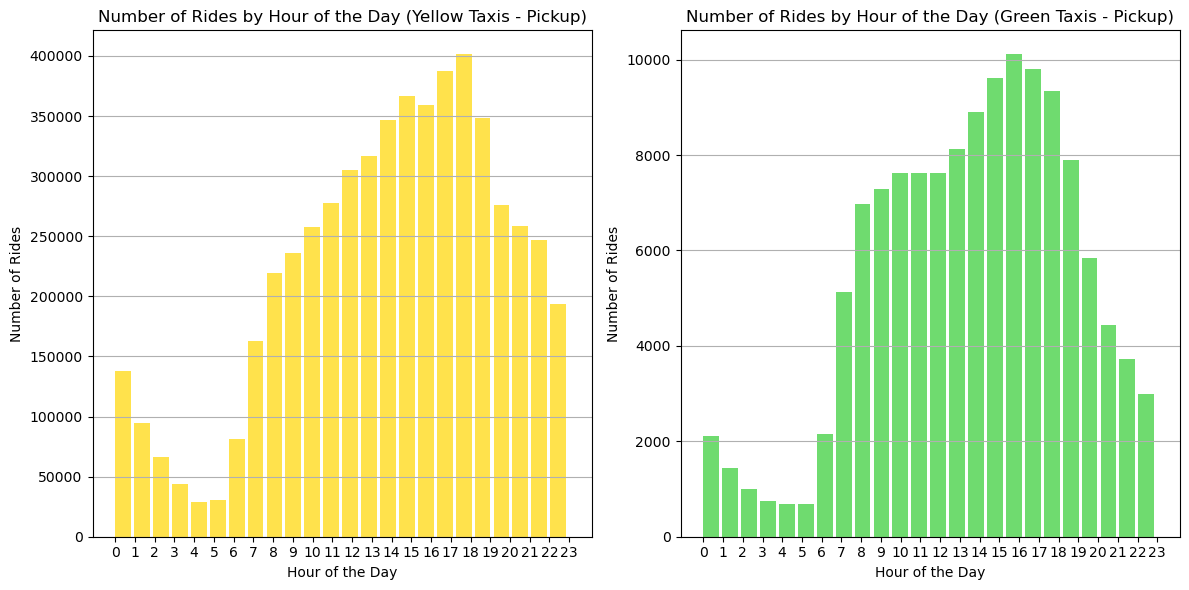

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess the data
# Assuming you already have the data loaded into the variables df_yellow and df_green

# Convert pickup and dropoff timestamps to datetime
df_yellow['pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_yellow['dropoff_datetime'] = pd.to_datetime(df_yellow['tpep_dropoff_datetime'])
df_green['pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])
df_green['dropoff_datetime'] = pd.to_datetime(df_green['lpep_dropoff_datetime'])

# Extract temporal features
df_yellow['pickup_hour'] = df_yellow['pickup_datetime'].dt.hour
df_green['pickup_hour'] = df_green['pickup_datetime'].dt.hour
df_yellow['pickup_day_of_week'] = df_yellow['pickup_datetime'].dt.dayofweek
df_green['pickup_day_of_week'] = df_green['pickup_datetime'].dt.dayofweek
df_yellow['pickup_month'] = df_yellow['pickup_datetime'].dt.month
df_green['pickup_month'] = df_green['pickup_datetime'].dt.month

# Analyze the number of rides by time of day
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Yellow Taxis (Pickup)
axes[0].hist(df_yellow['pickup_hour'], bins=24, color='gold', alpha=0.7, edgecolor='black', linewidth=0, width=0.8)
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Number of Rides')
axes[0].set_title('Number of Rides by Hour of the Day (Yellow Taxis - Pickup)')
axes[0].set_xticks(range(24))
axes[0].grid(axis='y')

# Green Taxis (Pickup)
axes[1].hist(df_green['pickup_hour'], bins=24, color='limegreen', alpha=0.7, edgecolor='black', linewidth=0, width=0.8)
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Number of Rides')
axes[1].set_title('Number of Rides by Hour of the Day (Green Taxis - Pickup)')
axes[1].set_xticks(range(24))
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()




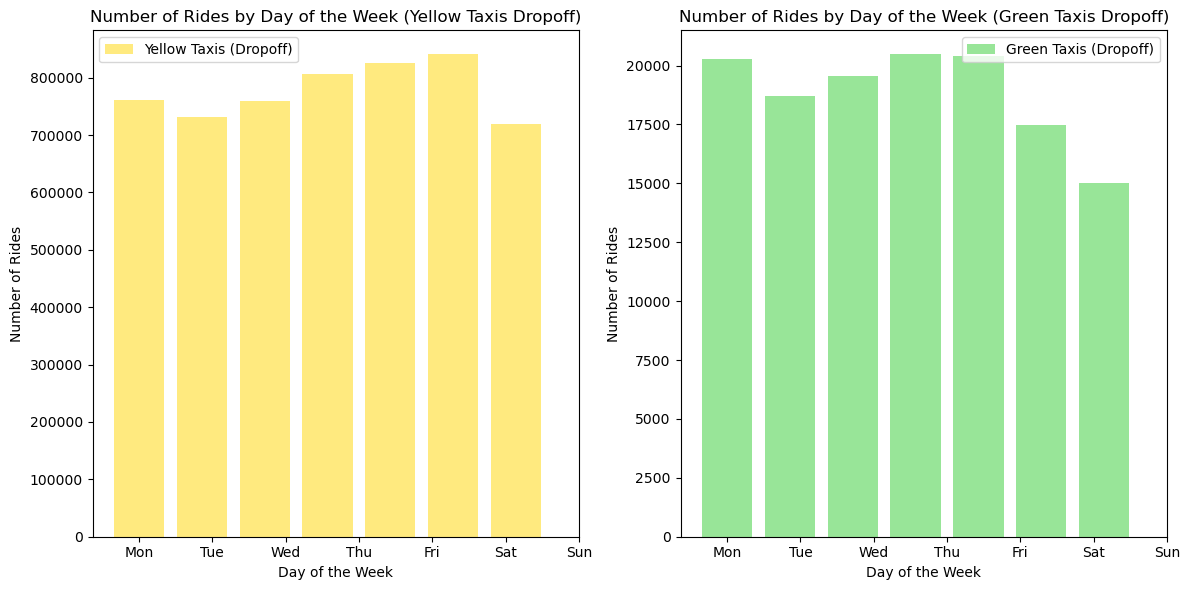

In [14]:
import matplotlib.pyplot as plt

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Number of rides by day of the week for yellow taxis (dropoff)
ax1.hist(df_yellow['tpep_pickup_datetime'].dt.dayofweek, bins=7, range=(0, 6), align='left', rwidth=0.8, alpha=0.5, color='gold', label='Yellow Taxis (Dropoff)')
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Number of Rides')
ax1.set_title('Number of Rides by Day of the Week (Yellow Taxis Dropoff)')
ax1.set_xticks(range(7))
ax1.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0, ha='center')
ax1.legend()

# Number of rides by day of the week for green taxis (dropoff)
ax2.hist(df_green['lpep_pickup_datetime'].dt.dayofweek, bins=7, range=(0, 6), align='left', rwidth=0.8, alpha=0.5, color='limegreen', label='Green Taxis (Dropoff)')
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Number of Rides')
ax2.set_title('Number of Rides by Day of the Week (Green Taxis Dropoff)')
ax2.set_xticks(range(7))
ax2.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0, ha='center')
ax2.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()



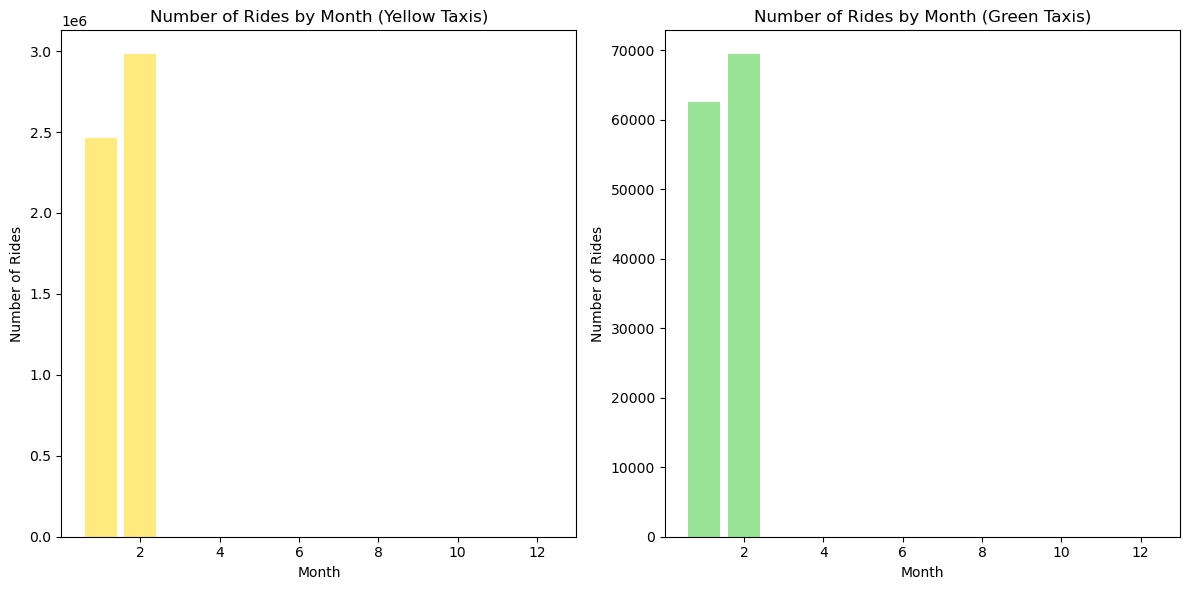

In [15]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Number of rides by month for yellow taxis
axs[0].hist(df_yellow['tpep_pickup_datetime'].dt.month, bins=12, range=(1, 13), align='left', rwidth=0.8, alpha=0.5, color='gold')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Number of Rides')
axs[0].set_title('Number of Rides by Month (Yellow Taxis)')

# Number of rides by month for green taxis
axs[1].hist(df_green['lpep_pickup_datetime'].dt.month, bins=12, range=(1, 13), align='left', rwidth=0.8, alpha=0.5, color='limegreen')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Number of Rides')
axs[1].set_title('Number of Rides by Month (Green Taxis)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



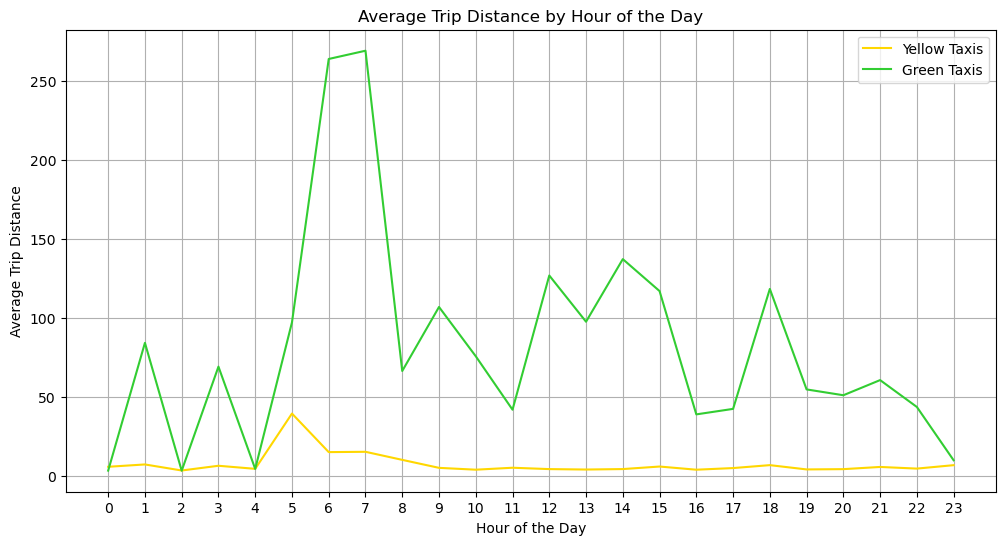

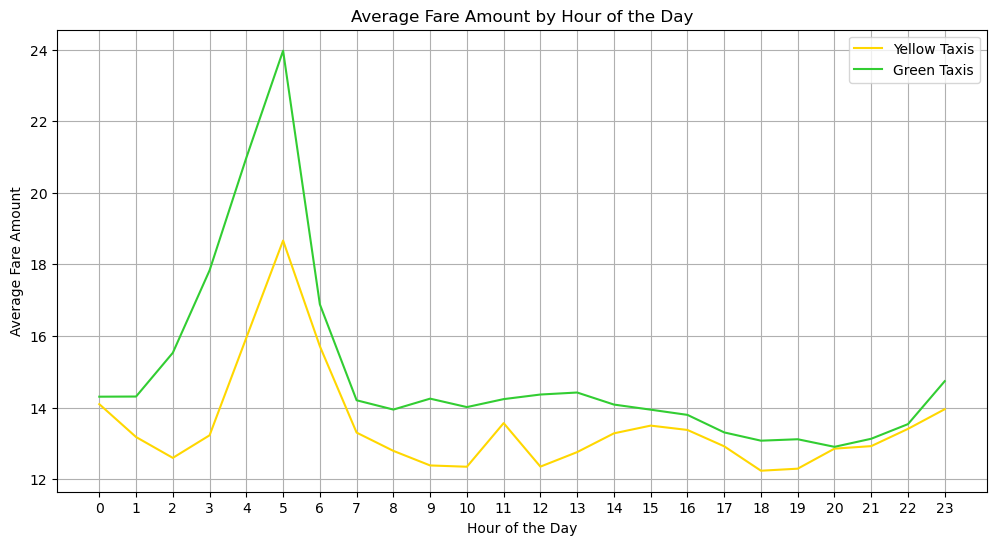

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette for muted shades
sns.set_palette("muted")

# Relationship between temporal patterns and trip distance
plt.figure(figsize=(12, 6))
df_yellow.groupby('pickup_hour')['trip_distance'].mean().plot(label='Yellow Taxis', color='gold')
df_green.groupby('pickup_hour')['trip_distance'].mean().plot(label='Green Taxis', color='limegreen')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Distance')
plt.title('Average Trip Distance by Hour of the Day')
plt.xticks(range(24))  # Set x-axis ticks for every hour
plt.grid(True)  # Add a grid
plt.legend()
plt.show()

# Relationship between temporal patterns and fare amount
plt.figure(figsize=(12, 6))
df_yellow.groupby('pickup_hour')['fare_amount'].mean().plot(label='Yellow Taxis', color='gold')
df_green.groupby('pickup_hour')['fare_amount'].mean().plot(label='Green Taxis', color='limegreen')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Hour of the Day')
plt.xticks(range(24))  # Set x-axis ticks for every hour
plt.grid(True)  # Add a grid
plt.legend()
plt.show()


### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

C:\Users\magnu\AppData\Local\Temp\ipykernel_13236\905365431.py:29: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  yellow_data_filtered = yellow_data.loc[start_date:end_date]


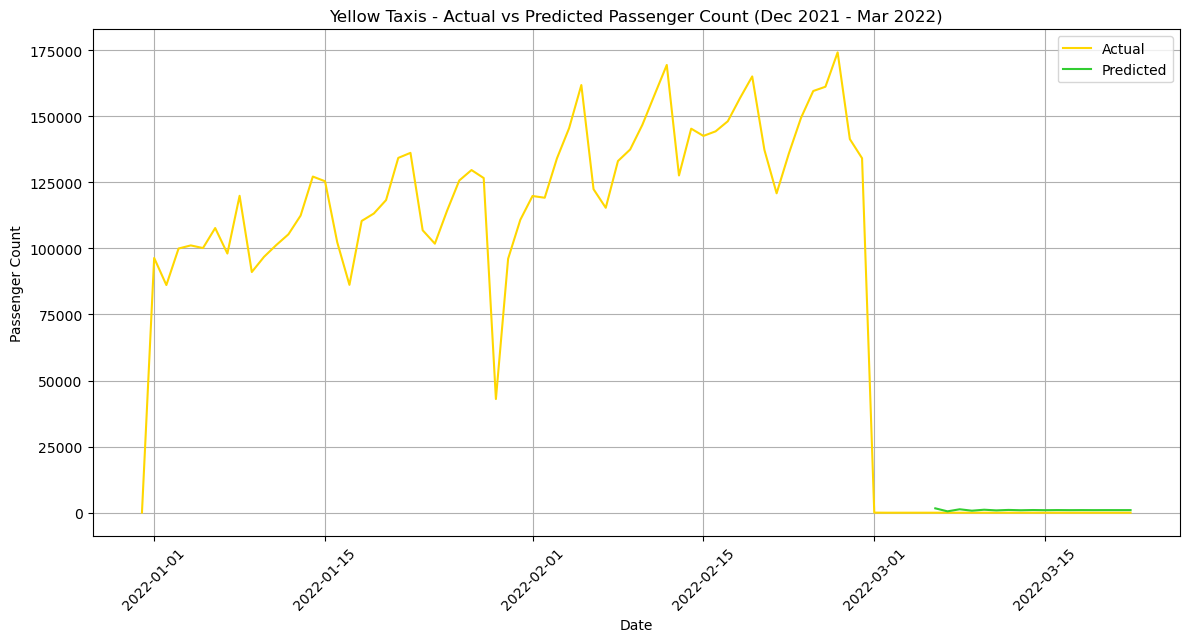

Yellow Taxis - Mean Squared Error: 1051808.4318453684


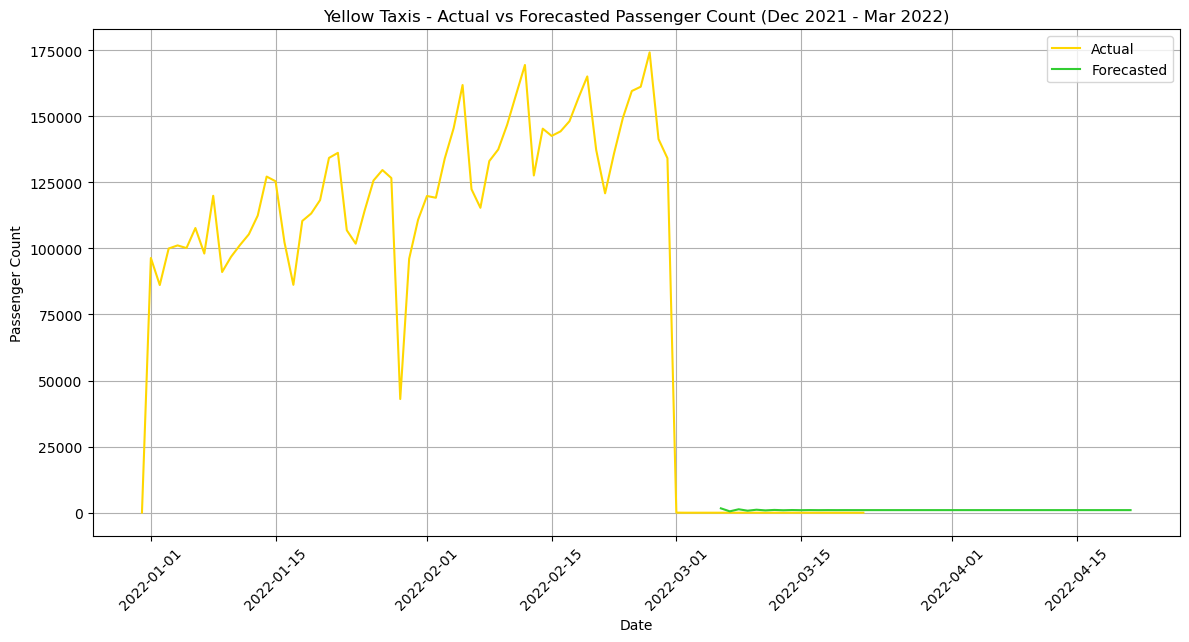

Yellow Taxis - Forecasted Passenger Count:
2022-03-06    1652.108652
2022-03-07     515.432577
2022-03-08    1297.483139
2022-03-09     759.420365
2022-03-10    1129.615800
2022-03-11     874.915667
2022-03-12    1050.153263
2022-03-13     929.587111
2022-03-14    1012.538471
2022-03-15     955.466664
2022-03-16     994.732942
2022-03-17     967.717141
2022-03-18     986.304426
2022-03-19     973.516089
2022-03-20     982.314661
2022-03-21     976.261109
2022-03-22     980.426045
2022-03-23     977.560505
2022-03-24     979.532041
2022-03-25     978.175594
2022-03-26     979.108850
2022-03-27     978.466756
2022-03-28     978.908527
2022-03-29     978.604581
2022-03-30     978.813700
2022-03-31     978.669823
2022-04-01     978.768813
2022-04-02     978.700707
2022-04-03     978.747565
2022-04-04     978.715326
2022-04-05     978.737507
2022-04-06     978.722246
2022-04-07     978.732745
2022-04-08     978.725521
2022-04-09     978.730492
2022-04-10     978.727072
2022-04-11     978.72

In [17]:
#Yellow Taxis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import seaborn as sns

# Set the color palette for muted shades
sns.set_palette("muted")


# Load the yellow and green taxi data
yellow_data = df_yellow
green_data = df_green

# Preprocess the data for yellow taxis
yellow_data['tpep_pickup_datetime'] = pd.to_datetime(yellow_data['tpep_pickup_datetime'])
yellow_data = yellow_data.set_index('tpep_pickup_datetime')

# Preprocess the data for green taxis
green_data['lpep_pickup_datetime'] = pd.to_datetime(green_data['lpep_pickup_datetime'])
green_data = green_data.set_index('lpep_pickup_datetime')

# Filter the yellow taxi data to the desired date range
start_date = '2021-12-01'
end_date = '2022-03-31'
yellow_data_filtered = yellow_data.loc[start_date:end_date]

# Aggregate the passenger count data by day
daily_passenger_count = yellow_data_filtered['passenger_count'].resample('D').sum()

# Split the filtered passenger count data into train and test sets
split_index = int(len(daily_passenger_count) * 0.8)
train_data = daily_passenger_count[:split_index]
test_data = daily_passenger_count[split_index:]

# Create the ARIMA model for passenger count
order = (1, 1, 1)  # Order of ARIMA model
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Predict the passenger count
predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Plot the predicted passenger count
plt.figure(figsize=(12, 6))
plt.plot(daily_passenger_count.index, daily_passenger_count, label='Actual', color='gold')
plt.plot(predictions.index, predictions, label='Predicted', color='limegreen')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.title('Yellow Taxis - Actual vs Predicted Passenger Count (Dec 2021 - Mar 2022)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Evaluate the model
mse = mean_squared_error(test_data, predictions)
print("Yellow Taxis - Mean Squared Error:", mse)

# Perform forecasting
forecast_start_date = test_data.index[0]
forecast_end_date = test_data.index[-1] + pd.DateOffset(days=30)  # Extend the forecast by 30 days
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')
forecast = model_fit.predict(start=forecast_start_date, end=forecast_end_date)

# Plot the forecasted passenger count
plt.figure(figsize=(12, 6))
plt.plot(daily_passenger_count.index, daily_passenger_count, label='Actual', color='gold')
plt.plot(forecast_dates, forecast, label='Forecasted', color='limegreen')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.title('Yellow Taxis - Actual vs Forecasted Passenger Count (Dec 2021 - Mar 2022)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Print the forecasted passenger count
print("Yellow Taxis - Forecasted Passenger Count:")
print(forecast)






C:\Users\magnu\AppData\Local\Temp\ipykernel_13236\905365431.py:29: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  yellow_data_filtered = yellow_data.loc[start_date:end_date]


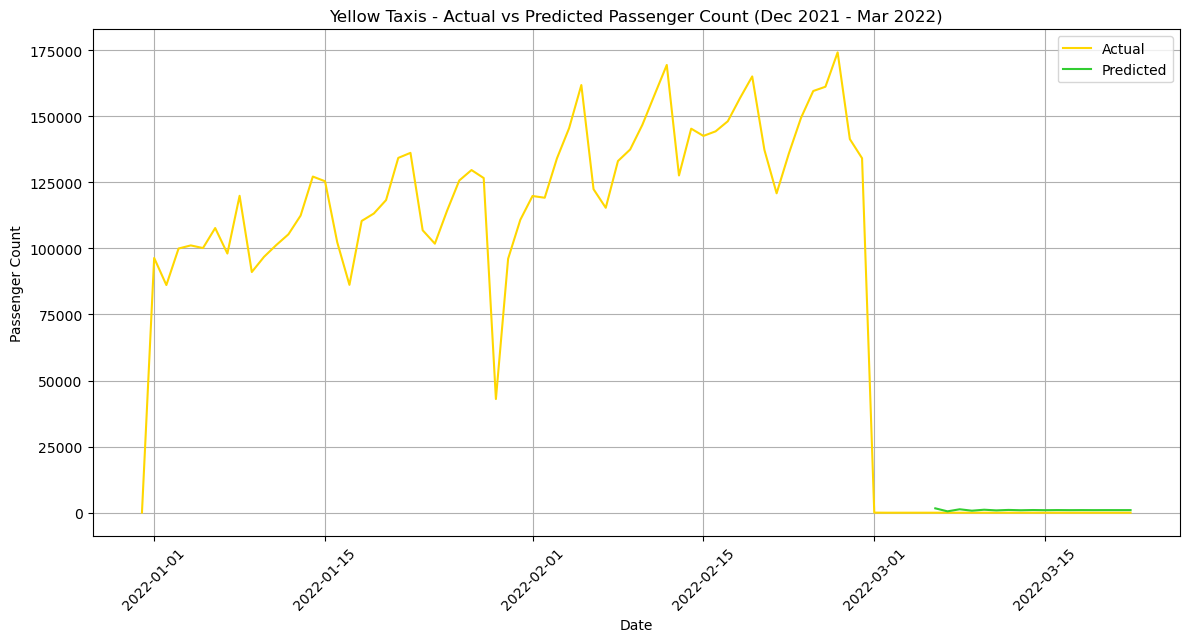

Yellow Taxis - Mean Squared Error: 1051808.4318453684


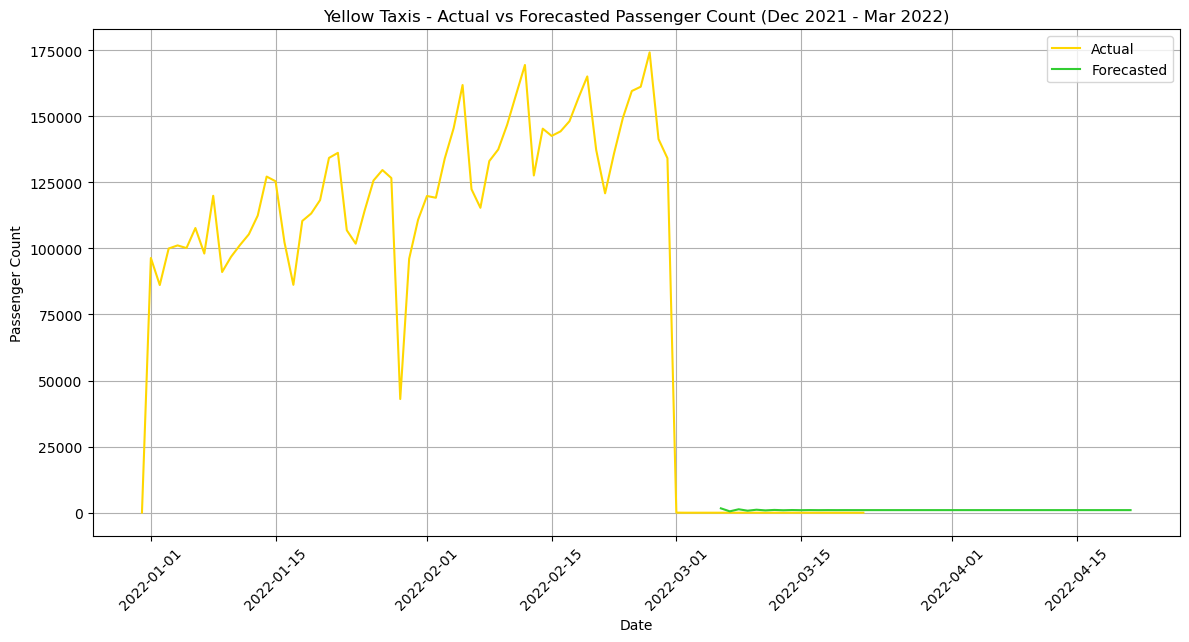

Yellow Taxis - Forecasted Passenger Count:
2022-03-06    1652.108652
2022-03-07     515.432577
2022-03-08    1297.483139
2022-03-09     759.420365
2022-03-10    1129.615800
2022-03-11     874.915667
2022-03-12    1050.153263
2022-03-13     929.587111
2022-03-14    1012.538471
2022-03-15     955.466664
2022-03-16     994.732942
2022-03-17     967.717141
2022-03-18     986.304426
2022-03-19     973.516089
2022-03-20     982.314661
2022-03-21     976.261109
2022-03-22     980.426045
2022-03-23     977.560505
2022-03-24     979.532041
2022-03-25     978.175594
2022-03-26     979.108850
2022-03-27     978.466756
2022-03-28     978.908527
2022-03-29     978.604581
2022-03-30     978.813700
2022-03-31     978.669823
2022-04-01     978.768813
2022-04-02     978.700707
2022-04-03     978.747565
2022-04-04     978.715326
2022-04-05     978.737507
2022-04-06     978.722246
2022-04-07     978.732745
2022-04-08     978.725521
2022-04-09     978.730492
2022-04-10     978.727072
2022-04-11     978.72

In [18]:
#Yellow Taxis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import seaborn as sns

# Set the color palette for muted shades
sns.set_palette("muted")


# Load the yellow and green taxi data
yellow_data = df_yellow
green_data = df_green

# Preprocess the data for yellow taxis
yellow_data['tpep_pickup_datetime'] = pd.to_datetime(yellow_data['tpep_pickup_datetime'])
yellow_data = yellow_data.set_index('tpep_pickup_datetime')

# Preprocess the data for green taxis
green_data['lpep_pickup_datetime'] = pd.to_datetime(green_data['lpep_pickup_datetime'])
green_data = green_data.set_index('lpep_pickup_datetime')

# Filter the yellow taxi data to the desired date range
start_date = '2021-12-01'
end_date = '2022-03-31'
yellow_data_filtered = yellow_data.loc[start_date:end_date]

# Aggregate the passenger count data by day
daily_passenger_count = yellow_data_filtered['passenger_count'].resample('D').sum()

# Split the filtered passenger count data into train and test sets
split_index = int(len(daily_passenger_count) * 0.8)
train_data = daily_passenger_count[:split_index]
test_data = daily_passenger_count[split_index:]

# Create the ARIMA model for passenger count
order = (1, 1, 1)  # Order of ARIMA model
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Predict the passenger count
predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Plot the predicted passenger count
plt.figure(figsize=(12, 6))
plt.plot(daily_passenger_count.index, daily_passenger_count, label='Actual', color='gold')
plt.plot(predictions.index, predictions, label='Predicted', color='limegreen')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.title('Yellow Taxis - Actual vs Predicted Passenger Count (Dec 2021 - Mar 2022)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Evaluate the model
mse = mean_squared_error(test_data, predictions)
print("Yellow Taxis - Mean Squared Error:", mse)

# Perform forecasting
forecast_start_date = test_data.index[0]
forecast_end_date = test_data.index[-1] + pd.DateOffset(days=30)  # Extend the forecast by 30 days
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')
forecast = model_fit.predict(start=forecast_start_date, end=forecast_end_date)

# Plot the forecasted passenger count
plt.figure(figsize=(12, 6))
plt.plot(daily_passenger_count.index, daily_passenger_count, label='Actual', color='gold')
plt.plot(forecast_dates, forecast, label='Forecasted', color='limegreen')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.title('Yellow Taxis - Actual vs Forecasted Passenger Count (Dec 2021 - Mar 2022)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Print the forecasted passenger count
print("Yellow Taxis - Forecasted Passenger Count:")
print(forecast)






C:\Users\magnu\AppData\Local\Temp\ipykernel_13236\905365431.py:29: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  yellow_data_filtered = yellow_data.loc[start_date:end_date]


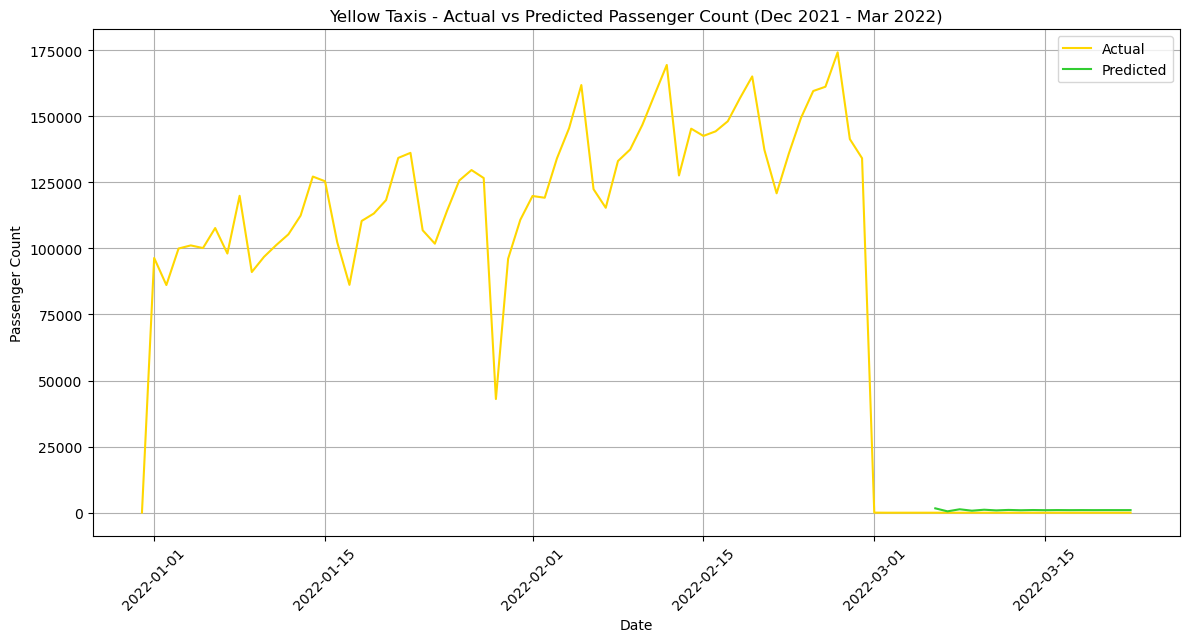

Yellow Taxis - Mean Squared Error: 1051808.4318453684


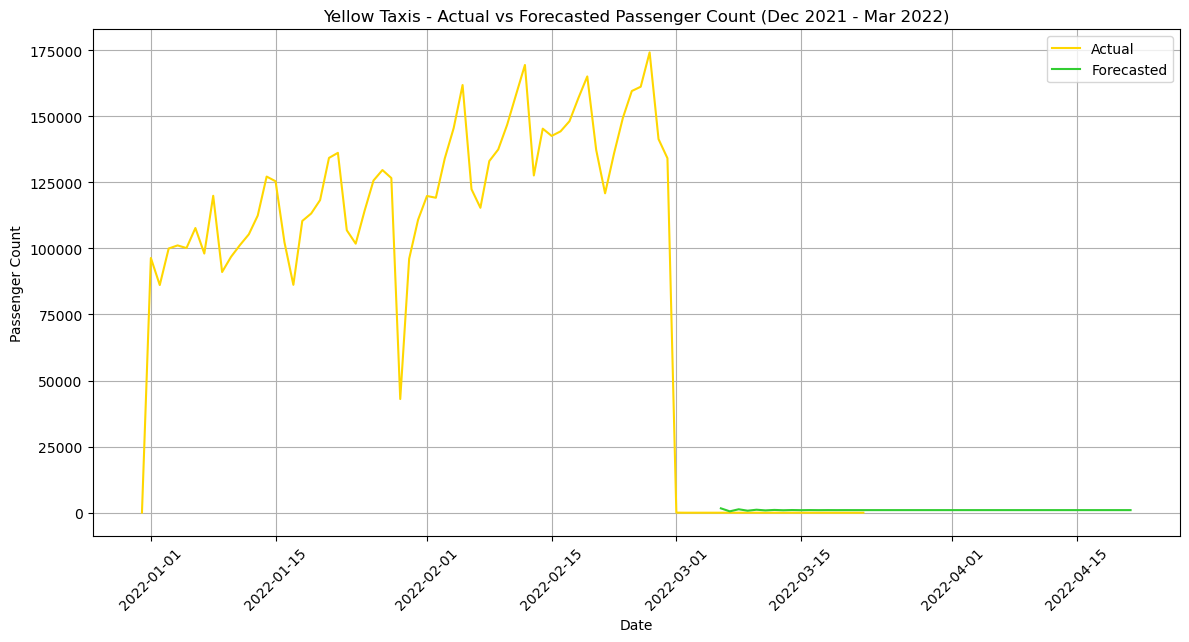

Yellow Taxis - Forecasted Passenger Count:
2022-03-06    1652.108652
2022-03-07     515.432577
2022-03-08    1297.483139
2022-03-09     759.420365
2022-03-10    1129.615800
2022-03-11     874.915667
2022-03-12    1050.153263
2022-03-13     929.587111
2022-03-14    1012.538471
2022-03-15     955.466664
2022-03-16     994.732942
2022-03-17     967.717141
2022-03-18     986.304426
2022-03-19     973.516089
2022-03-20     982.314661
2022-03-21     976.261109
2022-03-22     980.426045
2022-03-23     977.560505
2022-03-24     979.532041
2022-03-25     978.175594
2022-03-26     979.108850
2022-03-27     978.466756
2022-03-28     978.908527
2022-03-29     978.604581
2022-03-30     978.813700
2022-03-31     978.669823
2022-04-01     978.768813
2022-04-02     978.700707
2022-04-03     978.747565
2022-04-04     978.715326
2022-04-05     978.737507
2022-04-06     978.722246
2022-04-07     978.732745
2022-04-08     978.725521
2022-04-09     978.730492
2022-04-10     978.727072
2022-04-11     978.72

In [19]:
#Yellow Taxis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import seaborn as sns

# Set the color palette for muted shades
sns.set_palette("muted")


# Load the yellow and green taxi data
yellow_data = df_yellow
green_data = df_green

# Preprocess the data for yellow taxis
yellow_data['tpep_pickup_datetime'] = pd.to_datetime(yellow_data['tpep_pickup_datetime'])
yellow_data = yellow_data.set_index('tpep_pickup_datetime')

# Preprocess the data for green taxis
green_data['lpep_pickup_datetime'] = pd.to_datetime(green_data['lpep_pickup_datetime'])
green_data = green_data.set_index('lpep_pickup_datetime')

# Filter the yellow taxi data to the desired date range
start_date = '2021-12-01'
end_date = '2022-03-31'
yellow_data_filtered = yellow_data.loc[start_date:end_date]

# Aggregate the passenger count data by day
daily_passenger_count = yellow_data_filtered['passenger_count'].resample('D').sum()

# Split the filtered passenger count data into train and test sets
split_index = int(len(daily_passenger_count) * 0.8)
train_data = daily_passenger_count[:split_index]
test_data = daily_passenger_count[split_index:]

# Create the ARIMA model for passenger count
order = (1, 1, 1)  # Order of ARIMA model
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Predict the passenger count
predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Plot the predicted passenger count
plt.figure(figsize=(12, 6))
plt.plot(daily_passenger_count.index, daily_passenger_count, label='Actual', color='gold')
plt.plot(predictions.index, predictions, label='Predicted', color='limegreen')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.title('Yellow Taxis - Actual vs Predicted Passenger Count (Dec 2021 - Mar 2022)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Evaluate the model
mse = mean_squared_error(test_data, predictions)
print("Yellow Taxis - Mean Squared Error:", mse)

# Perform forecasting
forecast_start_date = test_data.index[0]
forecast_end_date = test_data.index[-1] + pd.DateOffset(days=30)  # Extend the forecast by 30 days
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')
forecast = model_fit.predict(start=forecast_start_date, end=forecast_end_date)

# Plot the forecasted passenger count
plt.figure(figsize=(12, 6))
plt.plot(daily_passenger_count.index, daily_passenger_count, label='Actual', color='gold')
plt.plot(forecast_dates, forecast, label='Forecasted', color='limegreen')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.title('Yellow Taxis - Actual vs Forecasted Passenger Count (Dec 2021 - Mar 2022)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Print the forecasted passenger count
print("Yellow Taxis - Forecasted Passenger Count:")
print(forecast)






### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.